In [1]:
import numpy as np
import matplotlib.pyplot as plt


0.4878151620384291 0.4050180942257535


<ipython-input-24-86b6efd316fc>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  signals[ch, :] = 1 * np.exp(-1j* 2 * np.pi * f * np.arange(0, NSAMP, 1) / fsamp)
<ipython-input-24-86b6efd316fc>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  noise[ch, :] = n[:, 0] + 1j * n[:, 1]


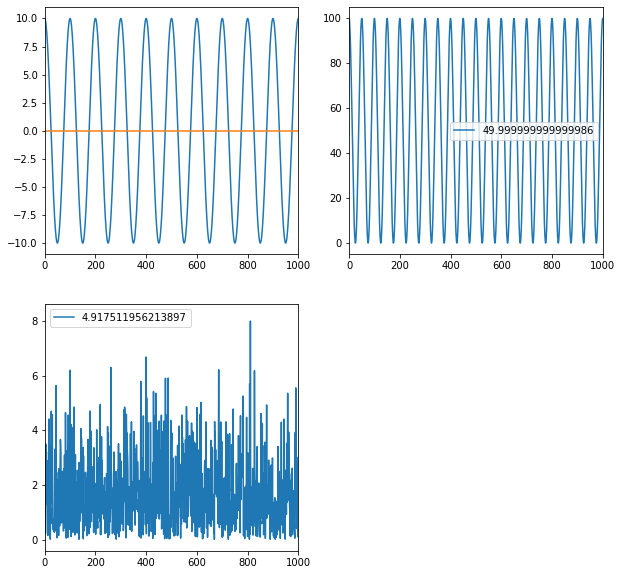

In [24]:
NCH = 10
NSAMP = 10000
f = 100
fsamp = 10000
var = 1
signals = np.zeros((NCH, NSAMP))

for ch in range(NCH):
    signals[ch, :] = 1 * np.exp(-1j* 2 * np.pi * f * np.arange(0, NSAMP, 1) / fsamp)

noise = np.zeros((NCH, NSAMP))
for ch in range(NCH):
    n = np.random.multivariate_normal([0, 0], np.eye(2) * var / 2, NSAMP)
    noise[ch, :] = n[:, 0] + 1j * n[:, 1]

print(np.mean(abs(noise[0, :])**2), np.mean(abs(signals[0, :]))**2)
    
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
ax.plot(signals.sum(0).real)
ax.plot(signals.sum(0).imag)
ax.set_xlim(0, 1000)

ax = plt.subplot(2,2,2)
ax.plot(abs(signals.sum(0))**2, label = np.mean(abs(signals.sum(0))**2))
ax.set_xlim(0, 1000)
plt.legend()

ax = plt.subplot(2,2,3)
ax.plot(abs(noise.sum(0)), label = np.mean(abs(noise.sum(0))**2))
ax.set_xlim(0, 1000)
plt.legend()